In [4]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


Here we have imported th file from .csv to Pandas


In [5]:
import pandas as pd

# Load the dataset
file_path = 'PhishingData.csv'  # Replace with the exact filename if different
data = pd.read_csv(file_path)


In [ ]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1.0,-1.0,-1.0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1.0,1.0,-1.0
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0.0,-1.0,-1.0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1.0,1.0,-1.0
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1.0,1.0,1.0


In [6]:
data.tail()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,11055,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [7]:
data.shape

(11055, 32)

In [8]:
data.isnull().sum()

,0
index,0
having_IPhaving_IP_Address,0
URLURL_Length,0
Shortining_Service,0
having_At_Symbol,0
double_slash_redirecting,0
Prefix_Suffix,0
having_Sub_Domain,0
SSLfinal_State,0
Domain_registeration_length,0


From here we are going to do Data Cleaning

In [9]:
data = data.drop_duplicates()


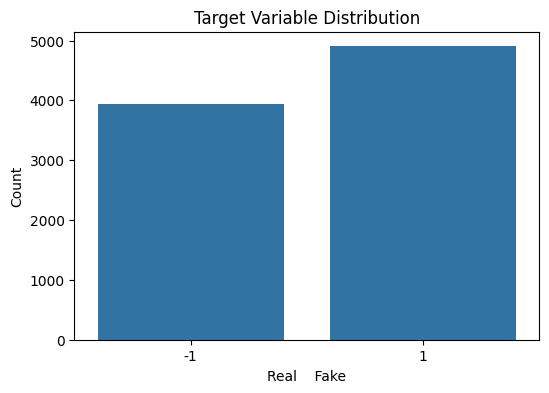

In [50]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)  # Use y_train or y_test based on your analysis
plt.title('Target Variable Distribution')
plt.xlabel('Real    Fake')
plt.ylabel('Count')
plt.show()


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Features and target
X = df.drop(columns=["Result", "index"])
y = df["Result"]

# Feature scaling (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test data shape: {X_test.shape}")


X_train shape: (8844, 31)
X_test data shape: (2211, 31)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9588963963963963
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       812
           1       0.95      0.98      0.96       964

    accuracy                           0.96      1776
   macro avg       0.96      0.96      0.96      1776
weighted avg       0.96      0.96      0.96      1776



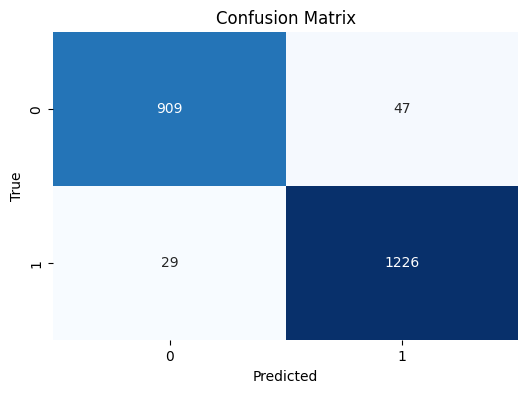

In [36]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_rf)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [73]:
def test_phishing_url():
    print("\nEnter the feature values for a single instance:")

    # Feature names based on your dataset
    feature_names = [
        "having_IPhaving_IP_Address", "URLURL_Length", "Shortining_Service",
        "having_At_Symbol", "double_slash_redirecting", "Prefix_Suffix",
        "having_Sub_Domain", "SSLfinal_State", "Domain_registeration_length",
        "Favicon", "port", "HTTPS_token", "Request_URL", "URL_of_Anchor",
        "Links_in_tags", "SFH", "Submitting_to_email", "Abnormal_URL",
        "Redirect", "on_mouseover", "RightClick","Shortining_Service","popUpWidnow", "Iframe",
        "age_of_domain", "DNSRecord", "web_traffic", "Page_Rank",
        "Google_Index", "Links_pointing_to_page", "Statistical_report",
    ]

    input_features = []

    # Collect input for each feature
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        input_features.append(value)

    # Convert input features to NumPy array and reshape
    input_features = np.array(input_features).reshape(1, -1)
    input_features = scaler.transform(input_features)  # Ensure data is scaled

    # Make prediction using the trained model
    prediction = svm_model.predict(input_features)

    # Display the result
    if prediction[0] == 1:
        print("\nPrediction: This URL is classified as Fake.")
    else:
        print("\nPrediction: This URL is classified as Real.")

# Call the function
test_phishing_url()



Enter the feature values for a single instance:
having_IPhaving_IP_Address: 1
URLURL_Length: 2
Shortining_Service: 1
having_At_Symbol: -1
double_slash_redirecting: 1
Prefix_Suffix: -1
having_Sub_Domain: 1
SSLfinal_State: -1
Domain_registeration_length: 1
Favicon: -1
port: -1
HTTPS_token: -1
Request_URL: -1
URL_of_Anchor: 1
Links_in_tags: -1
SFH: 1
Submitting_to_email: -1
Abnormal_URL: 1
Redirect: -1
on_mouseover: -1
RightClick: -1
Shortining_Service: -1
popUpWidnow: -1
Iframe: -1
age_of_domain: -1
DNSRecord: -1
web_traffic: 1
Page_Rank: -1
Google_Index: 1
Links_pointing_to_page: -1
Statistical_report: 1

Prediction: This URL is classified as Fake.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
def predict_for_index(index):


    # Extract the row corresponding to the index
    row = df[df["index"] == index]
    if row.empty:
        print(f"No data found for index {index}")
        return

    # Extract features and actual result
    features = row.drop(columns=["Result", "index"]).values
    actual_result = row["Result"].values[0]


    scaled_features = scaler.transform(features)


    predicted_result = svm_model.predict(scaled_features)[0]


    print(f"Actual result for index {index}: {actual_result}")
    print(f"Predicted result for index {index}: {predicted_result}")


index_to_check = int(input("Enter the index number: "))
predict_for_index(index_to_check)


Enter the index number: 43
Actual result for index 43: -1
Predicted result for index 43: -1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
